In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

In [ ]:
df_2022=pd.read_csv("/content/drive/MyDrive/AQI_HACKATHON/data/raw/cpcb_hourly_pm25_kolkata_rbu_2022.xls")
df_2022

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,01-01-2022 00:00,204.30,314.80,15.90,31.84,47.72,21.95,41.11,0.96,13.48,...,11.10,NaN,99.63,0.16,258.56,NaN,0.0,23.71,NaN,0.00
1,01-01-2022 01:00,188.48,279.70,8.95,24.21,33.17,23.85,44.17,0.63,20.71,...,4.11,NaN,99.63,0.19,252.44,NaN,0.0,24.60,NaN,0.01
2,01-01-2022 02:00,158.22,250.32,8.68,26.80,35.45,20.20,45.00,0.77,18.66,...,2.53,NaN,99.63,0.16,244.85,NaN,0.0,25.47,NaN,0.00
3,01-01-2022 03:00,134.00,219.17,8.03,26.73,34.77,18.40,37.69,0.65,22.22,...,2.94,NaN,99.63,0.27,262.58,NaN,0.0,25.41,NaN,0.00
4,01-01-2022 04:00,122.95,197.42,8.50,24.38,32.90,17.82,69.07,0.63,19.20,...,1.05,NaN,99.63,0.18,246.91,NaN,0.0,26.11,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022 19:00,152.97,254.63,10.57,0.56,3.33,13.42,14.18,1.30,20.55,...,2.84,19.91,67.77,0.26,181.56,0.0,0.0,7.84,1012.32,0.04
8756,31-12-2022 20:00,161.85,270.86,1.50,0.24,0.33,16.65,11.24,1.26,19.60,...,2.88,19.47,70.19,0.38,168.70,0.0,0.0,7.69,1012.82,0.04
8757,31-12-2022 21:00,159.56,269.69,0.27,0.63,0.06,13.54,10.67,1.43,15.35,...,2.93,19.10,72.02,0.51,279.40,0.0,0.0,7.70,1013.48,0.04
8758,31-12-2022 22:00,168.30,277.46,7.22,9.49,6.40,10.60,11.52,1.59,10.30,...,3.15,18.64,75.61,0.52,283.48,0.0,0.0,7.45,1013.53,0.04


In [ ]:
df_2023=pd.read_csv("/content/drive/MyDrive/AQI_HACKATHON/data/raw/cpcb_hourly_pm25_kolkata_rbu_2023.xls")
df_2023

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,01-01-2022 00:00,204.30,314.80,15.90,31.84,47.72,21.95,41.11,0.96,13.48,...,11.10,NaN,99.63,0.16,258.56,NaN,0.0,23.71,NaN,0.00
1,01-01-2022 01:00,188.48,279.70,8.95,24.21,33.17,23.85,44.17,0.63,20.71,...,4.11,NaN,99.63,0.19,252.44,NaN,0.0,24.60,NaN,0.01
2,01-01-2022 02:00,158.22,250.32,8.68,26.80,35.45,20.20,45.00,0.77,18.66,...,2.53,NaN,99.63,0.16,244.85,NaN,0.0,25.47,NaN,0.00
3,01-01-2022 03:00,134.00,219.17,8.03,26.73,34.77,18.40,37.69,0.65,22.22,...,2.94,NaN,99.63,0.27,262.58,NaN,0.0,25.41,NaN,0.00
4,01-01-2022 04:00,122.95,197.42,8.50,24.38,32.90,17.82,69.07,0.63,19.20,...,1.05,NaN,99.63,0.18,246.91,NaN,0.0,26.11,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022 19:00,152.97,254.63,10.57,0.56,3.33,13.42,14.18,1.30,20.55,...,2.84,19.91,67.77,0.26,181.56,0.0,0.0,7.84,1012.32,0.04
8756,31-12-2022 20:00,161.85,270.86,1.50,0.24,0.33,16.65,11.24,1.26,19.60,...,2.88,19.47,70.19,0.38,168.70,0.0,0.0,7.69,1012.82,0.04
8757,31-12-2022 21:00,159.56,269.69,0.27,0.63,0.06,13.54,10.67,1.43,15.35,...,2.93,19.10,72.02,0.51,279.40,0.0,0.0,7.70,1013.48,0.04
8758,31-12-2022 22:00,168.30,277.46,7.22,9.49,6.40,10.60,11.52,1.59,10.30,...,3.15,18.64,75.61,0.52,283.48,0.0,0.0,7.45,1013.53,0.04


In [ ]:
df_2024=pd.read_csv("/content/drive/MyDrive/AQI_HACKATHON/data/raw/cpcb_hourly_pm25_kolkata_rbu_2024.xls")
df_2024

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,01-01-2024 00:00,61.47,152.67,9.14,17.54,16.74,30.08,10.23,1.27,11.75,...,0.84,17.53,87.22,0.28,192.06,0.0,0.0,5.46,1007.48,0.04
1,01-01-2024 01:00,63.45,155.46,8.44,17.85,16.33,29.65,9.78,1.17,19.73,...,0.64,17.54,86.59,0.63,93.40,0.0,0.0,5.92,1007.45,0.04
2,01-01-2024 02:00,61.88,152.09,8.58,18.21,16.64,30.19,8.30,1.14,19.72,...,0.42,16.86,85.90,0.95,85.95,0.0,0.0,2.90,1007.32,0.04
3,01-01-2024 03:00,57.63,144.49,8.98,18.17,16.94,30.54,7.08,1.09,23.38,...,0.36,16.24,84.76,0.76,90.06,0.0,0.0,3.14,1007.42,0.03
4,01-01-2024 04:00,53.32,135.38,9.53,17.77,17.18,30.74,6.10,1.09,23.74,...,0.29,15.86,85.01,0.68,91.26,0.0,0.0,3.78,1007.95,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,31-12-2024 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8780,31-12-2024 20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8781,31-12-2024 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8782,31-12-2024 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
for df in [df_2022, df_2023, df_2024]:
    df['Timestamp'] = (
        df['Timestamp'].astype(str).str.strip()
    )
    df['Timestamp'] = pd.to_datetime(
        df['Timestamp'],
        errors='coerce',
        dayfirst=True
    )

In [ ]:
print("Bad timestamps 2022:", df_2022['Timestamp'].isna().sum())
print("Bad timestamps 2023:", df_2023['Timestamp'].isna().sum())
print("Bad timestamps 2024:", df_2024['Timestamp'].isna().sum())

Bad timestamps 2022: 0
Bad timestamps 2023: 0
Bad timestamps 2024: 0


In [ ]:
df_2022 = df_2022.sort_values('Timestamp')
df_2023 = df_2023.sort_values('Timestamp')
df_2024 = df_2024.sort_values('Timestamp')

In [ ]:
df_all = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Final sort
df_all = df_all.sort_values('Timestamp').reset_index(drop=True)

# Final sanity check
print("Combined shape:", df_all.shape)
print("Date range:", df_all['Timestamp'].min(), "→", df_all['Timestamp'].max())

Combined shape: (26304, 25)
Date range: 2022-01-01 00:00:00 → 2024-12-31 23:00:00


In [ ]:
df_all.to_csv(
    "/content/drive/MyDrive/AQI_HACKATHON/data/processed/pm25_hourly_kolkata_rbu_2022_2024.xls",
    index=False
)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AQI_HACKATHON/data/processed/pm25_hourly_kolkata_rbu_2022_2024.xls")
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2022-01-01 00:00:00,204.30,314.80,15.90,31.84,47.72,21.95,41.11,0.96,13.48,...,11.10,NaN,99.63,0.16,258.56,NaN,0.0,23.71,NaN,0.00
1,2022-01-01 00:00:00,204.30,314.80,15.90,31.84,47.72,21.95,41.11,0.96,13.48,...,11.10,NaN,99.63,0.16,258.56,NaN,0.0,23.71,NaN,0.00
2,2022-01-01 01:00:00,188.48,279.70,8.95,24.21,33.17,23.85,44.17,0.63,20.71,...,4.11,NaN,99.63,0.19,252.44,NaN,0.0,24.60,NaN,0.01
3,2022-01-01 01:00:00,188.48,279.70,8.95,24.21,33.17,23.85,44.17,0.63,20.71,...,4.11,NaN,99.63,0.19,252.44,NaN,0.0,24.60,NaN,0.01
4,2022-01-01 02:00:00,158.22,250.32,8.68,26.80,35.45,20.20,45.00,0.77,18.66,...,2.53,NaN,99.63,0.16,244.85,NaN,0.0,25.47,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2024-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
26300,2024-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
26301,2024-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
26302,2024-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Timestamp,0
PM2.5 (µg/m³),2326
PM10 (µg/m³),2357
NO (µg/m³),2598
NO2 (µg/m³),2528
NOx (ppb),2520
NH3 (µg/m³),2652
SO2 (µg/m³),2040
CO (mg/m³),2120
Ozone (µg/m³),2184


In [ ]:
df=df.rename(columns={'PM2.5 (µg/m³)': 'pm2.5'})

In [ ]:
df=df.dropna(subset=["pm2.5"])
df["pm2.5"].isnull().sum()

np.int64(0)

In [ ]:
columns_to_drop = [
    "Xylene (µg/m³)",
    "O Xylene (µg/m³)",
    "Eth-Benzene (µg/m³)"
]
df = df.drop(columns=columns_to_drop, errors="ignore")
df

,Timestamp,pm2.5,PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2022-01-01 00:00:00,204.30,314.80,15.90,31.84,47.72,21.95,41.11,0.96,13.48,...,11.10,NaN,99.63,0.16,258.56,NaN,0.0,23.71,NaN,0.00
1,2022-01-01 00:00:00,204.30,314.80,15.90,31.84,47.72,21.95,41.11,0.96,13.48,...,11.10,NaN,99.63,0.16,258.56,NaN,0.0,23.71,NaN,0.00
2,2022-01-01 01:00:00,188.48,279.70,8.95,24.21,33.17,23.85,44.17,0.63,20.71,...,4.11,NaN,99.63,0.19,252.44,NaN,0.0,24.60,NaN,0.01
3,2022-01-01 01:00:00,188.48,279.70,8.95,24.21,33.17,23.85,44.17,0.63,20.71,...,4.11,NaN,99.63,0.19,252.44,NaN,0.0,24.60,NaN,0.01
4,2022-01-01 02:00:00,158.22,250.32,8.68,26.80,35.45,20.20,45.00,0.77,18.66,...,2.53,NaN,99.63,0.16,244.85,NaN,0.0,25.47,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26291,2024-12-31 11:00:00,62.01,112.60,11.80,19.73,28.82,16.60,8.63,0.60,53.79,...,0.50,21.21,59.28,0.19,219.88,0.0,0.0,440.59,1023.75,7.24
26292,2024-12-31 12:00:00,56.72,105.72,10.27,19.59,27.15,16.88,8.58,0.57,64.52,...,0.94,21.89,56.09,0.48,188.15,0.0,0.0,499.15,1022.42,7.51
26293,2024-12-31 13:00:00,56.13,103.29,11.18,19.33,27.80,16.44,8.50,0.56,70.25,...,0.55,22.26,53.74,0.45,201.94,0.0,0.0,213.92,1021.35,3.32
26294,2024-12-31 14:00:00,55.32,101.08,8.62,19.20,25.11,17.29,8.54,0.60,73.91,...,0.39,22.61,50.49,0.34,211.90,0.0,0.0,151.44,1020.68,2.26


In [ ]:
input_features = ["Timestamp",
    "PM10 (µg/m³)",
    "NO (µg/m³)", "NO2 (µg/m³)", "NOx (ppb)",
    "NH3 (µg/m³)", "SO2 (µg/m³)", "CO (mg/m³)", "Ozone (µg/m³)",
    "AT (°C)", "RH (%)", "WS (m/s)", "WD (deg)",
    "RF (mm)", "TOT-RF (mm)", "SR (W/mt2)", "BP (mmHg)", "VWS (m/s)"
]

target = "pm2.5"

df = df[input_features + [target]]
df

,Timestamp,PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s),pm2.5
0,2022-01-01 00:00:00,314.80,15.90,31.84,47.72,21.95,41.11,0.96,13.48,NaN,99.63,0.16,258.56,NaN,0.0,23.71,NaN,0.00,204.30
1,2022-01-01 00:00:00,314.80,15.90,31.84,47.72,21.95,41.11,0.96,13.48,NaN,99.63,0.16,258.56,NaN,0.0,23.71,NaN,0.00,204.30
2,2022-01-01 01:00:00,279.70,8.95,24.21,33.17,23.85,44.17,0.63,20.71,NaN,99.63,0.19,252.44,NaN,0.0,24.60,NaN,0.01,188.48
3,2022-01-01 01:00:00,279.70,8.95,24.21,33.17,23.85,44.17,0.63,20.71,NaN,99.63,0.19,252.44,NaN,0.0,24.60,NaN,0.01,188.48
4,2022-01-01 02:00:00,250.32,8.68,26.80,35.45,20.20,45.00,0.77,18.66,NaN,99.63,0.16,244.85,NaN,0.0,25.47,NaN,0.00,158.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26291,2024-12-31 11:00:00,112.60,11.80,19.73,28.82,16.60,8.63,0.60,53.79,21.21,59.28,0.19,219.88,0.0,0.0,440.59,1023.75,7.24,62.01
26292,2024-12-31 12:00:00,105.72,10.27,19.59,27.15,16.88,8.58,0.57,64.52,21.89,56.09,0.48,188.15,0.0,0.0,499.15,1022.42,7.51,56.72
26293,2024-12-31 13:00:00,103.29,11.18,19.33,27.80,16.44,8.50,0.56,70.25,22.26,53.74,0.45,201.94,0.0,0.0,213.92,1021.35,3.32,56.13
26294,2024-12-31 14:00:00,101.08,8.62,19.20,25.11,17.29,8.54,0.60,73.91,22.61,50.49,0.34,211.90,0.0,0.0,151.44,1020.68,2.26,55.32


In [ ]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [ ]:
df = df.sort_values("Timestamp")

In [ ]:
df.set_index("Timestamp", inplace=True)

In [ ]:
input_features = [
    "PM10 (µg/m³)",
    "NO (µg/m³)", "NO2 (µg/m³)", "NOx (ppb)",
    "NH3 (µg/m³)", "SO2 (µg/m³)", "CO (mg/m³)", "Ozone (µg/m³)",
    "AT (°C)", "RH (%)", "WS (m/s)", "WD (deg)",
    "RF (mm)", "TOT-RF (mm)", "SR (W/mt2)", "BP (mmHg)", "VWS (m/s)"
]
df[input_features] = df[input_features].interpolate(method="time")

In [ ]:
df[input_features] = df[input_features].fillna(method="ffill")


In [ ]:
df.dropna(inplace=True)


In [ ]:
print(df.isna().sum())
print(df.index.dtype)   # should show datetime64[ns]


PM10 (µg/m³)     0
NO (µg/m³)       0
NO2 (µg/m³)      0
NOx (ppb)        0
NH3 (µg/m³)      0
SO2 (µg/m³)      0
CO (mg/m³)       0
Ozone (µg/m³)    0
AT (°C)          0
RH (%)           0
WS (m/s)         0
WD (deg)         0
RF (mm)          0
TOT-RF (mm)      0
SR (W/mt2)       0
BP (mmHg)        0
VWS (m/s)        0
pm2.5            0
dtype: int64
datetime64[ns]


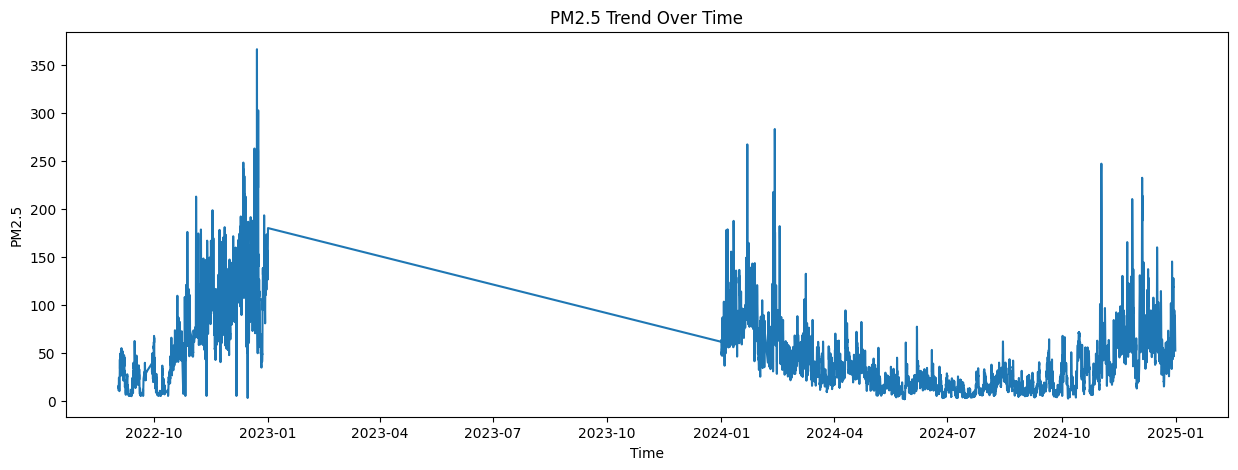

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df["pm2.5"])
plt.title("PM2.5 Trend Over Time")
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.show()

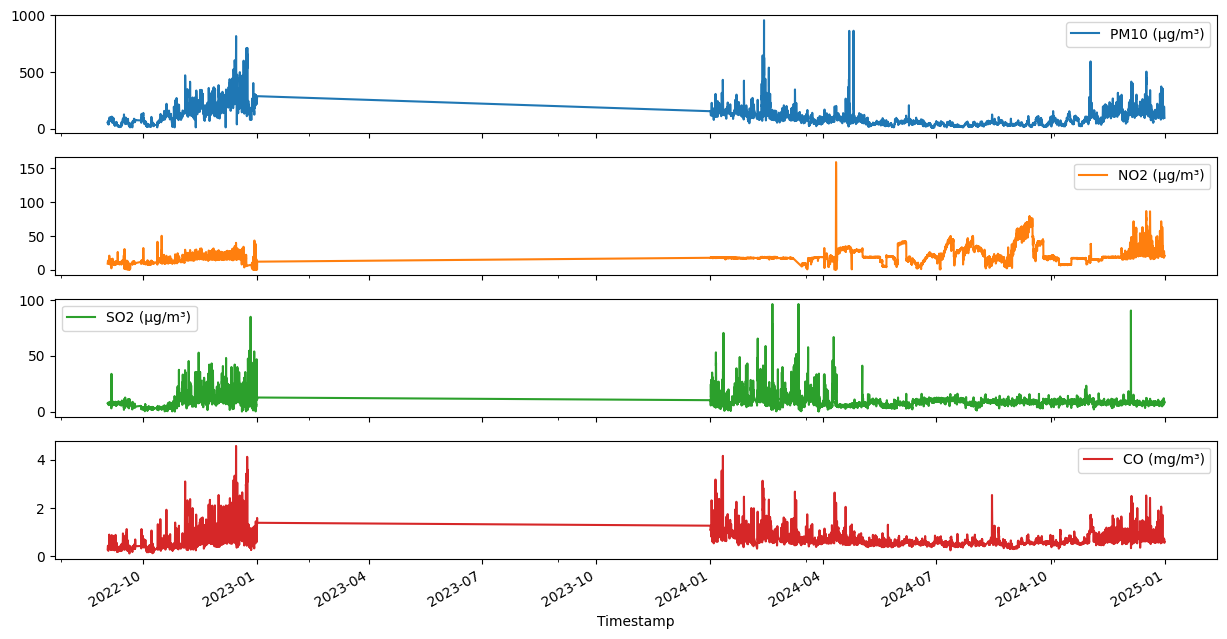

In [ ]:
pollutants = ["PM10 (µg/m³)", "NO2 (µg/m³)", "SO2 (µg/m³)", "CO (mg/m³)"]

df[pollutants].plot(subplots=True, figsize=(15,8))
plt.show()


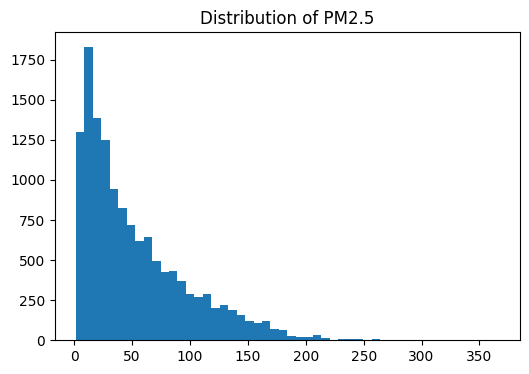

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df["pm2.5"], bins=50)
plt.title("Distribution of PM2.5")
plt.show()


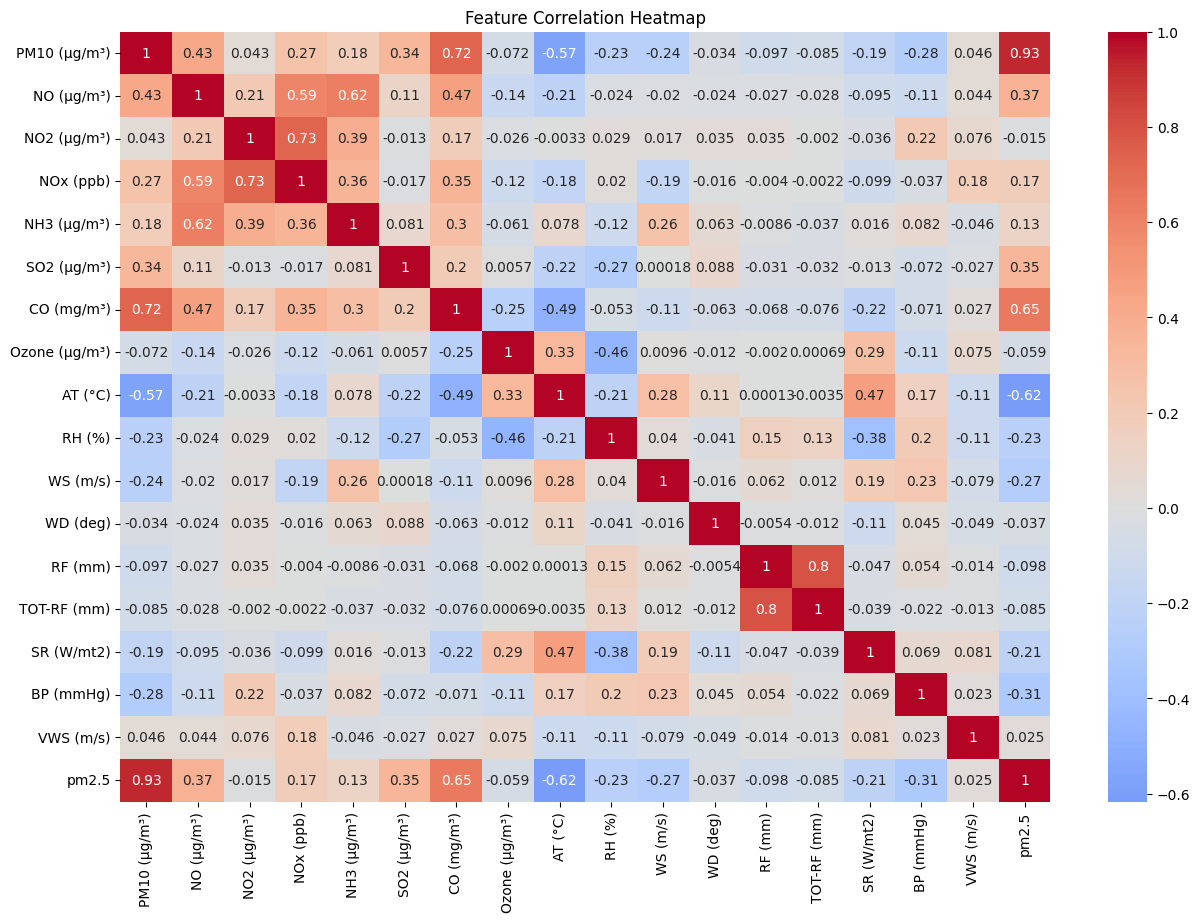

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0,annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

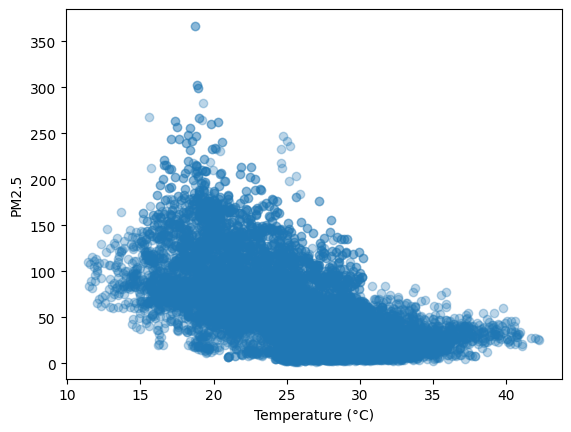

In [ ]:
plt.scatter(df["AT (°C)"], df["pm2.5"], alpha=0.3)
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5")
plt.show()


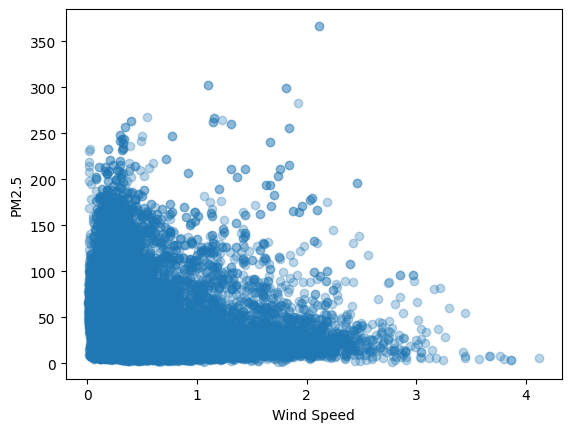

In [ ]:
plt.scatter(df["WS (m/s)"], df["pm2.5"], alpha=0.3)
plt.xlabel("Wind Speed")
plt.ylabel("PM2.5")
plt.show()


In [ ]:
# Cell 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
TensorFlow version: 2.19.0
NumPy version: 2.0.2
Pandas version: 2.2.2


In [ ]:
# Cell 2: CPCB AQI Calculation Function
def calculate_aqi_cpcb(pm25_value):
    """
    Calculate AQI based on PM2.5 concentration using CPCB (Central Pollution Control Board) standards

    AQI Categories (CPCB):
    0-50: Good
    51-100: Satisfactory
    101-200: Moderate
    201-300: Poor
    301-400: Very Poor
    401-500: Severe
    """

    # CPCB breakpoints for PM2.5 (24-hour average)
    breakpoints = [
        (0, 30, 0, 50),      # Good
        (31, 60, 51, 100),   # Satisfactory
        (61, 90, 101, 200),  # Moderate
        (91, 120, 201, 300), # Poor
        (121, 250, 301, 400),# Very Poor
        (251, 380, 401, 500) # Severe
    ]

    # Handle edge cases
    if pm25_value < 0:
        return 0
    if pm25_value > 380:
        return 500

    # Find the appropriate breakpoint
    for bp_lo, bp_hi, aqi_lo, aqi_hi in breakpoints:
        if bp_lo <= pm25_value <= bp_hi:
            # Linear interpolation formula
            aqi = ((aqi_hi - aqi_lo) / (bp_hi - bp_lo)) * (pm25_value - bp_lo) + aqi_lo
            return round(aqi, 2)

    return None

def get_aqi_category(aqi_value):
    """Get AQI category based on value"""
    if aqi_value <= 50:
        return "Good"
    elif aqi_value <= 100:
        return "Satisfactory"
    elif aqi_value <= 200:
        return "Moderate"
    elif aqi_value <= 300:
        return "Poor"
    elif aqi_value <= 400:
        return "Very Poor"
    else:
        return "Severe"

# Test the function
test_pm25_values = [15, 45, 75, 105, 150, 300]
print("Testing AQI Calculation:")
for pm25 in test_pm25_values:
    aqi = calculate_aqi_cpcb(pm25)
    category = get_aqi_category(aqi)
    print(f"PM2.5: {pm25:>6.2f} µg/m³ → AQI: {aqi:>6.2f} ({category})")


Testing AQI Calculation:
PM2.5:  15.00 µg/m³ → AQI:  25.00 (Good)
PM2.5:  45.00 µg/m³ → AQI:  74.66 (Satisfactory)
PM2.5:  75.00 µg/m³ → AQI: 148.79 (Moderate)
PM2.5: 105.00 µg/m³ → AQI: 248.79 (Poor)
PM2.5: 150.00 µg/m³ → AQI: 323.26 (Very Poor)
PM2.5: 300.00 µg/m³ → AQI: 438.60 (Severe)


In [ ]:
df.isnull().sum()

,0
PM10 (µg/m³),0
NO (µg/m³),0
NO2 (µg/m³),0
NOx (ppb),0
NH3 (µg/m³),0
SO2 (µg/m³),0
CO (mg/m³),0
Ozone (µg/m³),0
AT (°C),0
RH (%),0


In [ ]:
df = df.drop(
    columns=[
        "AT (°C)",
        "RH (%)",
        "WS (m/s)",
        "WD (deg)",
        "RF (mm)",
        "TOT-RF (mm)",
        "SR (W/mt2)",
        "BP (mmHg)",
        "VWS (m/s)"
    ],
    errors="ignore"
)
df

,PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),pm2.5
Timestamp,,,,,,,,,
2022-09-02 14:00:00,52.60,6.68,9.01,15.70,15.60,7.49,0.29,53.68,11.45
2022-09-02 14:00:00,52.60,6.68,9.01,15.70,15.60,7.49,0.29,53.68,11.45
2022-09-02 15:00:00,55.42,6.92,10.42,17.35,15.45,7.51,0.33,54.75,12.45
2022-09-02 15:00:00,55.42,6.92,10.42,17.35,15.45,7.51,0.33,54.75,12.45
2022-09-02 16:00:00,57.32,8.10,9.96,18.02,15.40,7.50,0.32,50.58,15.82
...,...,...,...,...,...,...,...,...,...
2024-12-31 11:00:00,112.60,11.80,19.73,28.82,16.60,8.63,0.60,53.79,62.01
2024-12-31 12:00:00,105.72,10.27,19.59,27.15,16.88,8.58,0.57,64.52,56.72
2024-12-31 13:00:00,103.29,11.18,19.33,27.80,16.44,8.50,0.56,70.25,56.13


In [ ]:
pm25 = df["pm2.5"].values.reshape(-1, 1)

n = len(pm25)
train_end = int(n * 0.8)

train_data = pm25[:train_end]
test_data  = pm25[train_end:]

train_data.shape, test_data.shape

((10787, 1), (2697, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_data)
test_scaled   = scaler.transform(test_data)



In [ ]:
LOOKBACK=72
HORIZON=72

def make_sequences(series, lookback=LOOKBACK, horizon=HORIZON):
    X, y = [], []
    for i in range(len(series) - lookback - horizon):
        X.append(series[i:i+lookback])
        y.append(series[i+lookback:i+lookback+horizon])
    return np.array(X), np.array(y)

X_train, y_train = make_sequences(train_scaled)
X_test, y_test   = make_sequences(test_scaled)

X_train.shape, y_train.shape


((10643, 72, 1), (10643, 72, 1))

In [ ]:
from tensorflow.keras.optimizers import Adam

model_lstm.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="mse"
)

In [ ]:
y_train = y_train.squeeze(-1)
y_test  = y_test.squeeze(-1)

y_train.shape, y_test.shape


((10643, 72), (2553, 72))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_lstm = Sequential([
    LSTM(
        64,
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ),
    Dropout(0.1),

    LSTM(32),
    Dropout(0.1),

    Dense(32,activation="relu"),
    Dense(HORIZON)
])

model_lstm.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss="mse",
    metrics=["mae"]
)

model_lstm.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 72, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 72)             │         2,376 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,744 (127.91 KB)

 Trainable params: 32,744 (127.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)

In [ ]:
history = model_lstm.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - loss: 0.0043 - mae: 0.0436
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - loss: 0.0043 - mae: 0.0435
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - loss: 0.0043 - mae: 0.0434
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - loss: 0.0042 - mae: 0.0433
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - loss: 0.0043 - mae: 0.0434
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - loss: 0.0043 - mae: 0.0435
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - loss: 0.0042 - mae: 0.0432
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - loss: 0.0042 - mae: 0.0433
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - loss: 0.0042 - mae: 0.0430
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 0.0042 - mae: 0.0430
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 0.0042 - mae: 0.0430
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - loss: 0.0042 - mae: 0.0429
Epoch 13/50
8

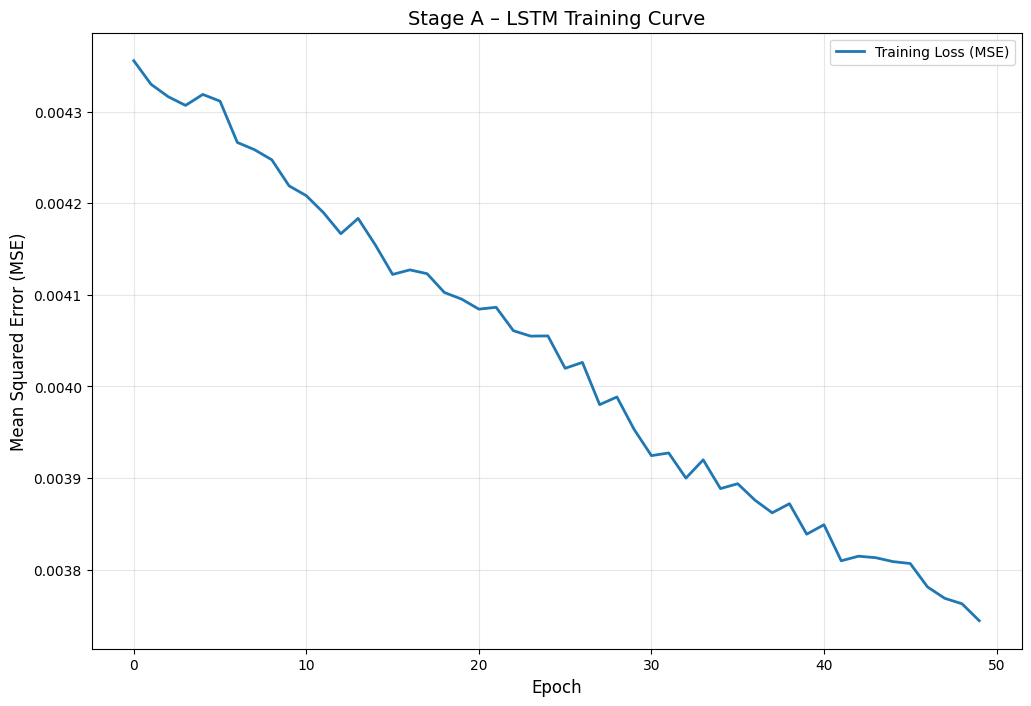

In [ ]:
import os
import matplotlib.pyplot as plt

# Directory to save plots
save_dir = "/content/drive/MyDrive/AQI_HACKATHON"
os.makedirs(save_dir, exist_ok=True)

# Plot training & validation loss
plt.figure(figsize=(12, 8))

plt.plot(history.history["loss"], label="Training Loss (MSE)", linewidth=2)

if "val_loss" in history.history:
    plt.plot(history.history["val_loss"], label="Validation Loss (MSE)", linewidth=2)

plt.title("Stage A – LSTM Training Curve", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Save figure
plt.savefig(
    os.path.join(save_dir, "lstm_training_curve.png"),
    dpi=150,
    bbox_inches="tight"
)

plt.show()


In [ ]:
import os

# Create models directory
os.makedirs("/content/drive/MyDrive/AQI_HACKATHON", exist_ok=True)

# Save Stage A forecasting model
model_lstm.save("/content/drive/MyDrive/AQI_HACKATHON/lstm_72hr.keras")

In [ ]:
y_pred = model_lstm.predict(X_test)

y_pred.shape

# Inverse scale ground truth
y_test_inv = scaler.inverse_transform(
    y_test.reshape(-1, 1)
).reshape(y_test.shape)

# Inverse scale predictions
y_pred_inv = scaler.inverse_transform(
    y_pred.reshape(-1, 1)
).reshape(y_pred.shape)

print("Inverse-scaled shapes:")
print(y_test_inv.shape, y_pred_inv.shape)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step
Inverse-scaled shapes:
(2553, 72) (2553, 72)


In [ ]:
def compute_metrics(y_true, y_pred, start, end):
    mae = mean_absolute_error(
        y_true[:, start:end].flatten(),
        y_pred[:, start:end].flatten()
    )

    mse = mean_squared_error(
        y_true[:, start:end].flatten(),
        y_pred[:, start:end].flatten()
    )

    rmse = np.sqrt(mse)

    return mae, rmse

In [ ]:
metrics = {
    "0–24 hrs":  compute_metrics(y_test_inv, y_pred_inv, 0, 24),
    "24–48 hrs": compute_metrics(y_test_inv, y_pred_inv, 24, 48),
    "48–72 hrs": compute_metrics(y_test_inv, y_pred_inv, 48, 72),
}

import pandas as pd

metrics_df = pd.DataFrame(
    metrics,
    index=["MAE (µg/m³)", "RMSE (µg/m³)"]
).T

metrics_df

,MAE (µg/m³),RMSE (µg/m³)
0–24 hrs,14.965134,23.480058
24–48 hrs,19.570595,28.437941
48–72 hrs,22.586610,32.129767


In [ ]:
import joblib
import os

# Ensure models directory exists
os.makedirs("/content/drive/MyDrive/AQI_HACKATHON", exist_ok=True)

# Save scaler
joblib.dump(scaler, "/content/drive/MyDrive/AQI_HACKATHON/pm25_scaler.pkl")

print("Scaler saved successfully.")

Scaler saved successfully.
